<a href="https://colab.research.google.com/github/dr-mushtaq/Machine-Learning/blob/master/Model_Selecton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Table of Content**</p>



*   Detect Overfitting and Underfitting
*   Learning and Validation Curves



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Detect Overfitting and Underfitting**</p>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = DecisionTreeClassifier(max_depth=None)  # try different depths
model.fit(X_train, y_train)

# Evaluate
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:     {test_acc:.3f}")


Training Accuracy: 1.000
Test Accuracy:     1.000


In [ ]:
| Training Accuracy | Test Accuracy  | Diagnosis    |
| ----------------- | -------------- | ------------ |
| High              | Low            | Overfitting  |
| Low               | Low            | Underfitting |
| Similar & High    | Similar & High | Good Fit ✅   |


**📈 Visualize with Learning Curves (Optional but Powerful)**

Scikit-learn has a built-in tool to plot learning curves — which is very helpful to spot overfitting and underfitting.

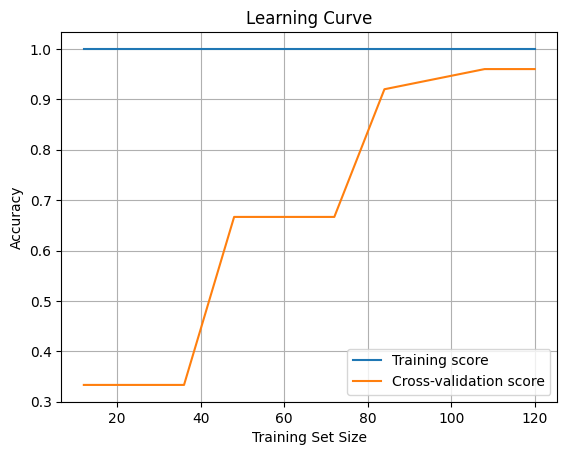

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

# Calculate mean and std
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.grid()
plt.show()


🔍 Interpretation of the Learning Curve:

Overfitting: Large gap between training and test curves

Underfitting: Both curves are low and close together

Good Fit: Curves are high and close together

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Learning and Validation Curves**</p>

🧪 Learning Curve

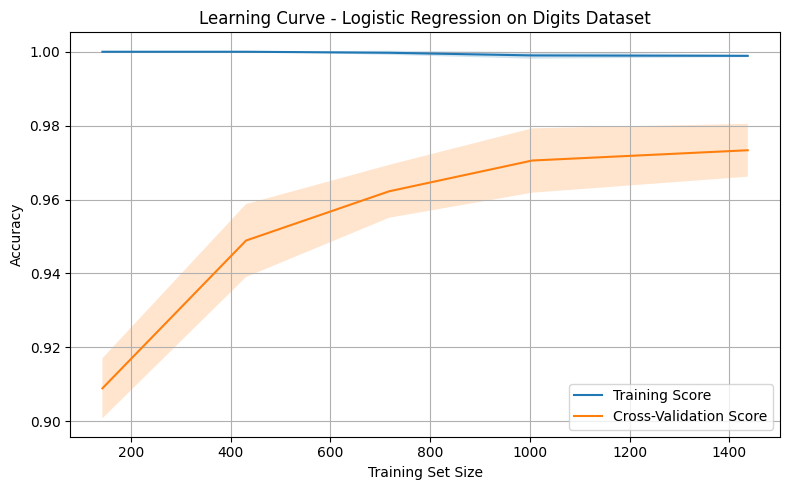

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset
X, y = load_digits(return_X_y=True)

# Create a pipeline with standard scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Set up cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring='accuracy',
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0], random_state=42
)

# Calculate average and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression on Digits Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**📊 Learning Curve Interpretation**

**Axes**:

X-axis: Size of the training set (increasing from left to right)

Y-axis: Accuracy (ranges from ~0.91 to 1.00)

**Curves:**

Blue Line: Training accuracy (flat and near 100%)

Orange Line: Cross-validation (test) accuracy, increasing with more data

Shaded Area: Standard deviation (confidence intervals)

**🧠 What It Tells Us:**

1. Training Score Is High and Flat (~100%)
Your model performs almost perfectly on the training set, even with small amounts of data.

This is typical of models with high capacity, like logistic regression on relatively simple datasets.

2. Validation (Test) Score Starts Low (~91%) and Improves
At smaller training sizes, the model doesn’t generalize as well. This could be due to overfitting.

As the training size increases, validation accuracy improves and levels off around 96.5–97%.

3. Gap Between Training and Validation Scores
There's a visible gap between the two curves, especially at the start.

This suggests overfitting on smaller datasets — the model memorizes training data but struggles to generalize.

As training data increases, overfitting reduces slightly.

4. Small Variance (Narrow Shaded Area)
Low variance in cross-validation scores indicates stable generalization.

Your model behaves consistently across different splits of data.

**✅ Final Diagnosis**

In [ ]:
| Observation                      | Meaning                               |
| -------------------------------- | ------------------------------------- |
| Training score is perfect        | Low training error — possible overfit |
| Validation score is high (\~97%) | Good generalization with enough data  |
| Initial gap between scores       | Overfitting at small sample sizes     |
| Curve flattens out               | Model reaches a performance plateau   |


**📌 What You Can Do Next:**

Try using regularization (C in LogisticRegression) to reduce overfitting.

Experiment with other models (e.g., RandomForest or SVC) and compare their curves.

Use a validation curve to tune C and find the best balance between bias and variance.

**📊 Python Code: Validation Curve Example**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target
param_range = np.logspace(-3, 3, 5)
train_scores, test_scores = validation_curve(
 SVC(), X, y,
 param_name="gamma",
 param_range=param_range,
 cv=5,
 scoring="accuracy"
)

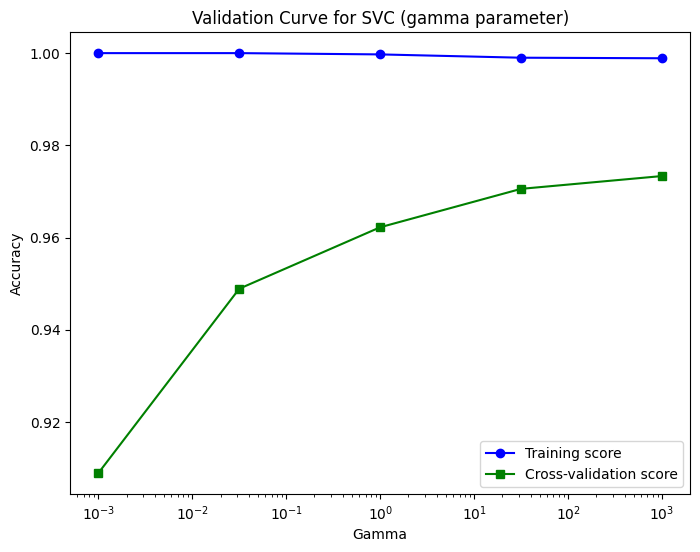

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green", marker="s")
plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.title("Validation Curve for SVC (gamma parameter)")
plt.legend(loc="best")
plt.show()

**📊 Validation Curve Interpretation (SVC - Gamma Parameter**

**🧠 What is gamma in SVC?**

In Support Vector Machines with RBF kernels:

Low gamma → wider decision boundary (simpler model)

High gamma → tighter, more complex decision boundary (more sensitive to training data)

**🔍 What We See in the Plot**

Axes:
X-axis (Gamma): Range of values from
Y-axis (Accuracy): Between 0.91 and 1.00

Curves:
Blue line (Training Score): Remains high (~1.00) across all gamma values

Green line (Cross-validation Score): Rises steadily with increasing gamma



**✅ What It Means**

In [ ]:
| Observation                                             | Interpretation                                                                    |
| ------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Training Score \~1.00 across all gamma values**       | Model fits the training data very well regardless of complexity                   |
| **Low gamma → low CV score (\~91%)**                    | Underfitting — model too simple to capture data patterns                          |
| **Increasing gamma improves CV score**                  | Complexity helps capture underlying structure, improving generalization           |
| **High gamma (100, 1000) → best CV score (\~97.5%)**    | Model achieves strong generalization and likely optimal complexity in this region |
| **Small gap between train and CV scores at high gamma** | Low variance, well-balanced model                                                 |


**🧠 Final Takeaway**

Underfitting at low gamma

Good generalization at medium-to-high gamma

No signs of overfitting yet (training accuracy is not much higher than validation)



**🧪 Suggested Next Steps**

Use GridSearchCV to fine-tune gamma around the optimal range (10 to 1000).

Try adjusting other hyperparameters like C (regularization strength).

Test on a hold-out test set to confirm real-world performance.

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Model Calibration: Making Probabilities Reliable**</p>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss

# Generate binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Uncalibrated model
model = RandomForestClassifier()
model.fit(X_train, y_train)
probs_uncalibrated = model.predict_proba(X_test)[:, 1]

# Calibrated model
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=3)
calibrated.fit(X_train, y_train)
probs_calibrated = calibrated.predict_proba(X_test)[:, 1]

print("Brier score (uncalibrated):", brier_score_loss(y_test, probs_uncalibrated))
print("Brier score (calibrated):", brier_score_loss(y_test, probs_calibrated))


Brier score (uncalibrated): 0.086248
Brier score (calibrated): 0.09492590926263039


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


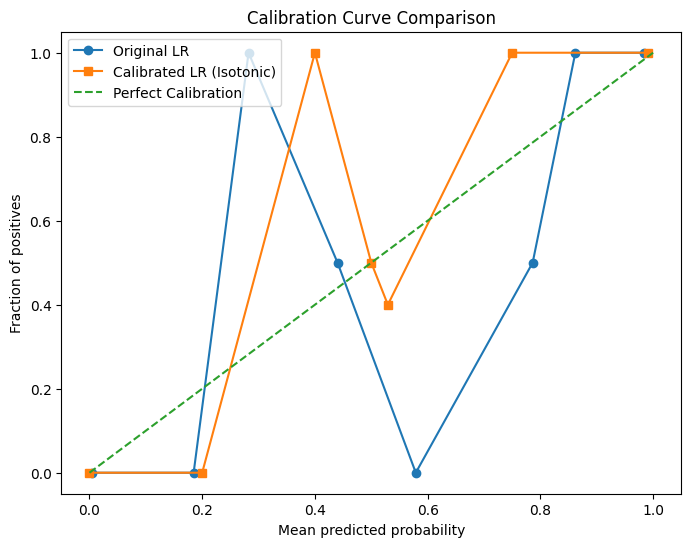

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LogisticRegression().fit(X_train, y_train)

prob_pos_lr = lr.predict_proba(X_test)[:, 1]
fraction_lr, mean_pred_lr = calibration_curve(y_test, prob_pos_lr, n_bins=10)

calibrated_clf = CalibratedClassifierCV(lr, cv='prefit', method='isotonic')
calibrated_clf.fit(X_train, y_train)
prob_pos_calibrated = calibrated_clf.predict_proba(X_test)[:, 1]
fraction_cal, mean_pred_cal = calibration_curve(y_test, prob_pos_calibrated, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_pred_lr, fraction_lr, marker='o', label='Original LR')
plt.plot(mean_pred_cal, fraction_cal, marker='s', label='Calibrated LR (Isotonic)')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve Comparison")
plt.legend(loc="upper left")
plt.show()

We can see that the calibrated logistic regression is closer to the model with perfect calibration than the original. This means that the calibrated model can better estimate the actual risk, although it is still not ideal.

Try using the calibration method to improve the model prediction capability.

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**🧪 Permutation Importance: Know What Really Matters**</p>

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Display top 5 important features
import numpy as np
indices = np.argsort(result.importances_mean)[-5:]

for i in indices[::-1]:
    print(f"Feature {i}: Importance = {result.importances_mean[i]:.4f}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

In [ ]:
importances = result.importances_mean
std = result.importances_std

for i, name in enumerate(data.feature_names):
    print(f"{name}: Mean importance = {importances[i]:.4f} (+/- {std[i]:.4f})")

sepal length (cm): Mean importance = 0.0132 (+/- 0.0177)
sepal width (cm): Mean importance = 0.0000 (+/- 0.0000)
petal length (cm): Mean importance = 0.6000 (+/- 0.0805)
petal width (cm): Mean importance = 0.1553 (+/- 0.0362)


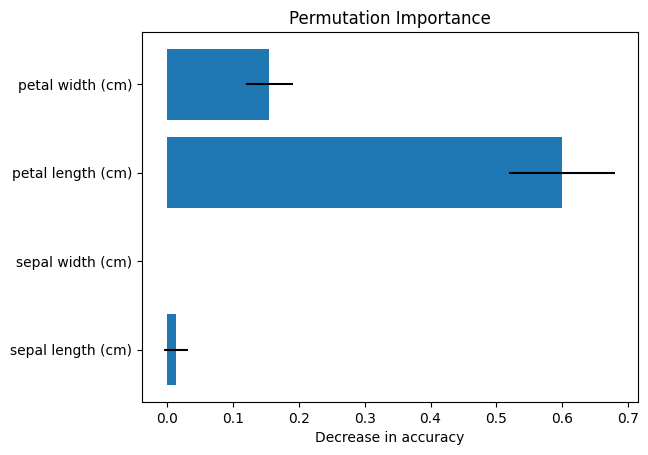

In [ ]:
plt.barh(data.feature_names, importances, xerr=std)
plt.xlabel("Decrease in accuracy")
plt.title("Permutation Importance")
plt.show()

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**🧪 Feature Hasher**</p>

In [ ]:
from sklearn.feature_extraction import FeatureHasher

data = [{'feature': 'dog'}, {'feature': 'cat'}, {'feature': 'rabbit'}]

hasher = FeatureHasher(n_features=5, input_type='string')
hashed_features = hasher.transform([d.values() for d in data])

print(hashed_features.toarray())

[[ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  0.]]


In [ ]:

import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import FeatureHasher

titanic = sns.load_dataset("titanic")

titanic_sample = titanic[['sex', 'embarked', 'class']].dropna()

data_dicts = titanic_sample.to_dict(orient='records')
hasher = FeatureHasher(n_features=10, input_type='dict')

hashed_features = hasher.transform(data_dicts)

hashed_array = hashed_features.toarray()
print("\nHashed feature matrix (dense format):\n", hashed_array)


Hashed feature matrix (dense format):
 [[ 1.  0.  0. ...  0. -1.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0. -1.  0.]
 [ 1.  0.  0. ...  0. -1.  0.]]


The dataset has been represented into a sparse matrix with 10 different features. You can specify the number of hash features you need to balance the memory usage and information loss.

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**🧪 Robust Scaler**</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import robust_scale
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

outlier = np.array([[10, 10, 10, 10]])
X_out = np.vstack([X, outlier])

X_scaled = robust_scale(X_out)

In [2]:
from sklearn.preprocessing import RobustScaler
import numpy as np

X = np.array([[10], [100], [1000], [10000]])
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)


[[-0.17021277]
 [-0.14184397]
 [ 0.14184397]
 [ 2.9787234 ]]


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**🧪 Feature Union**</p>

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import FeatureUnion

data = load_iris()
X, y = data.data, data.target

pca = PCA(n_components=2)

poly = PolynomialFeatures(degree=2, include_bias=False)

union = FeatureUnion(transformer_list=[
    ('pca', pca),
    ('poly', poly)
])

X_transformed = union.fit_transform(X)

In [4]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

union = FeatureUnion([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

X = np.array([[1, 2], [3, 4], [5, 6]])
X_transformed = union.fit_transform(X)

print(X_transformed)


[[-1.22474487 -1.22474487  1.          2.          1.          2.
   4.        ]
 [ 0.          0.          3.          4.          9.         12.
  16.        ]
 [ 1.22474487  1.22474487  5.          6.         25.         30.
  36.        ]]


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**References**</p>

[6 Lesser-Known Scikit-Learn Features That Will Save You Time](https://machinelearningmastery.com/6-lesser-known-scikit-learn-features-that-will-save-you-time/?fbclid=IwY2xjawJKddhleHRuA2FlbQIxMQABHfxTTI79EfQi9MKPN0BIdshPHZ9ptYBK19vcb1kCSZMgxjbh8xScSPFNhg_aem_wsz_RCM9yq7YyCbBPjyAcw)